# Respuesta P1: Análisis Datasets Raeggeton y TodoTipo
------

El objetivo de esta primera parte es usar estadística descriptiva y herramientas de visualización para ganar el máximo entendimiento posible de estos dos datasets. En esta sección ningun tipo de modificación se realizará a la data.


In [182]:
# libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set();

In [183]:
# leer datasets
reggaeton = pd.read_csv('data/data_reggaeton.csv')
todotipo = pd.read_csv('data/data_todotipo.csv')

## 1. Reggaeton Dataset
___

In [184]:
# dataset info
reggaeton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 15 columns):
Unnamed: 0          70 non-null int64
popularity          70 non-null int64
danceability        70 non-null float64
energy              70 non-null float64
key                 70 non-null int64
loudness            70 non-null float64
mode                70 non-null int64
speechiness         70 non-null float64
acousticness        70 non-null float64
instrumentalness    70 non-null float64
liveness            70 non-null float64
valence             70 non-null float64
tempo               70 non-null float64
duration            70 non-null int64
id_new              70 non-null int64
dtypes: float64(9), int64(6)
memory usage: 8.3 KB


In [185]:
# checkear por missing data
total = reggaeton.isnull().sum().sort_values(ascending=False)
percent = (reggaeton.isnull().sum()/reggaeton.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
id_new,0,0.0
duration,0,0.0
tempo,0,0.0
valence,0,0.0
liveness,0,0.0
instrumentalness,0,0.0
acousticness,0,0.0
speechiness,0,0.0
mode,0,0.0
loudness,0,0.0


Podemos observar que (felizmente) no hay missing values.

In [186]:
# estadística descriptiva
reggaeton.describe()

,Unnamed: 0,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,id_new
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,7.000000e+01,70.000000
mean,35.500000,56.957143,0.776000,0.778171,5.600000,-6.327571,0.571429,0.120620,0.158725,0.005461,0.189397,0.702671,105.910286,2.756467e+05,35.500000
std,20.351085,10.703427,0.080724,0.097774,3.696453,2.243060,0.498445,0.075096,0.132574,0.029874,0.128542,0.152090,28.554854,2.575437e+05,20.351085
min,1.000000,27.000000,0.503000,0.533000,0.000000,-13.268000,0.000000,0.032000,0.001650,0.000000,0.035400,0.354000,84.012000,1.516670e+05,1.000000
25%,18.250000,52.250000,0.743250,0.700250,1.000000,-7.128750,0.000000,0.064375,0.056025,0.000000,0.094475,0.582250,93.993500,1.964132e+05,18.250000
50%,35.500000,59.000000,0.792000,0.790000,6.500000,-6.031000,1.000000,0.090600,0.113000,0.000001,0.141000,0.722500,95.018500,2.195305e+05,35.500000
75%,52.750000,63.000000,0.827500,0.863500,9.000000,-4.959750,1.000000,0.161000,0.243500,0.000019,0.262500,0.830250,102.277750,2.509098e+05,52.750000
max,70.000000,75.000000,0.944000,0.946000,11.000000,-0.262000,1.000000,0.308000,0.563000,0.243000,0.776000,0.966000,214.058000,1.499600e+06,70.000000


A continuación se provee una descripción de las variables contenidas en la data (información obtenida desde la API de Spotify):

- **Unnamed:0**: Columna sin identificar que corresponde a un correlativo de de cada canción (o fila).
- **popularity**: Variable que indica el nivel de popularidad de una canción considerando número de reproducciones y búsquedas.
- **danceability**: Mide que tan bailable es una canción, considerando una combinación de características musicales tales cómo tempo, estabilidad de ritmo, fuerza del beat y regularidad. Un valor de 1 indica que es muy bailable.
- **energy**: Medida que representa que tan intensa y "movida" es una canción. Un valor de 1 indica mayor intensidad. 
- **key**: Número integer que representa la tonalidad de la canción. 0 corresponde a Do, 1 corresponde a Do#/ReB y así sucesivamente.
- **loudness**: Representa el volumen de la canción en decibeles.Son un promedio medido a través de toda la canción. Esta medida es útil para comparar el volumen relativo entre canción. Valores típos están entre -60 y 0 db.
- **mode**: Indica si la canción está en una tonalidad mayor o menor. 1 representa tonalidad mayor.
- **speechiness**: Medida de la presencia de palabras habladas en una canción. Valores cercanos a 1 significa que la canción se compone mayoritariamente de palabras (un ejemplo de un track con speechiness cercano a uno sería un talk-show).
- **acousticness**: Indicador que mide el nivel de *acusticidad* de una canción. Sus valores están en un rango de entre 0 y 1, dónde 1 significa que hay una alta probabilidad de que la canción sea acústica.
- **instrumentalness**: Predice si una canción contiene o no vocals. Valores cercanos a 1 indican mayor probabilidad de que la canción no contenga vocals.
- **liveness**: Mide la presencia de audiencia en la canción. Valores cercanos a 1 indican mayor probabilidad de que la canción sea live.
- **valence**:  Medida entre 0 y 1 que describe la "positividad" que comunica la canción. Valores cercanos a 1 indican mayor positividad.
- **tempo**: El tempo estimado de la canción medido en BPM (beats per minute).
- **duration**: Duración de la canción en mili-segundos.
- **id_new**: Índice.

A continuación, visualizaremos las distribuciones y correlaciones de las variables. Además, haremos un split de los datos considerando la variable binaria `mode`.

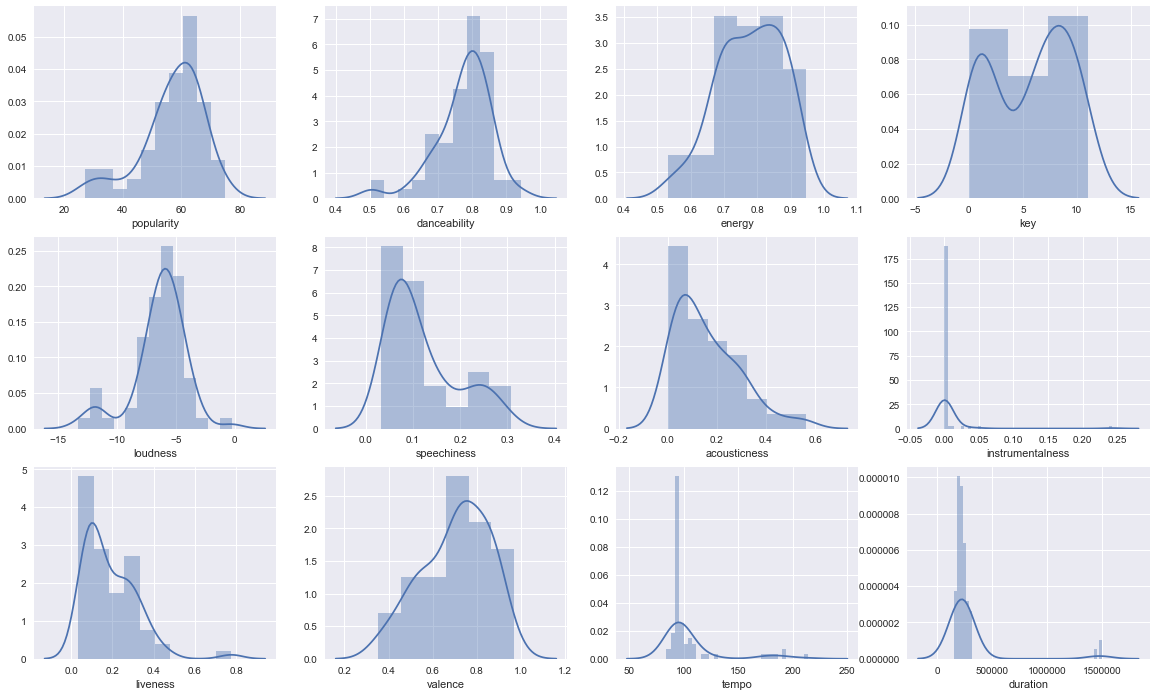

In [187]:
colnames = reggaeton.drop(columns=['Unnamed: 0', 'mode', 'id_new']).columns
rows = [0,0,0,0,1,1,1,1,2,2,2,2]
cols = [0,1,2,3]*3
f, axes = plt.subplots(3, 4, figsize=(20, 12), sharex=False)
for colname,i,j in list(zip(colnames,rows,cols)):
    sns.distplot(reggaeton.dropna()[colname], ax=axes[i, j])

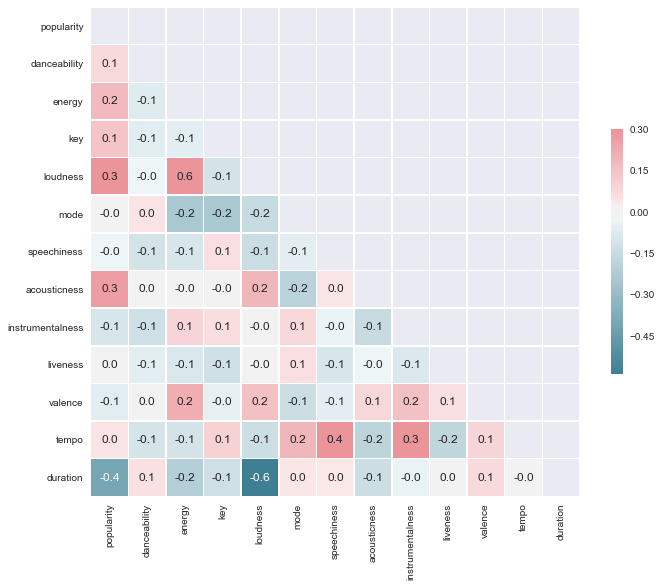

In [188]:
# matriz de correlaciones y heat-map
corr_reggaeton = reggaeton.drop(columns=['Unnamed: 0','id_new']).corr()
mask = np.zeros_like(corr_reggaeton, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_reggaeton, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Podemos observar que las variables no están fuertemente correlacionadas. `loudiness` y `duration` presentan una correlación negativa y `loudiness` y `energy` una correlación positiva de -0.6 y 0.6 respectivamente. 

Adicionalmente, observando las distribuciones de cada variable, no se detectan outliers importantes que pudieran sesgar los modelos. Se observa que todos los valores se encuentran en los rangos establecidos para cada variable según Spotify.

## 2. TodoTipo Dataset

In [189]:
# dataset info
todotipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 16 columns):
Unnamed: 0          2230 non-null int64
popularity          2229 non-null float64
danceability        2222 non-null float64
energy              2222 non-null float64
key                 2222 non-null float64
loudness            2222 non-null float64
mode                2222 non-null float64
speechiness         2222 non-null float64
acousticness        2222 non-null float64
instrumentalness    2222 non-null float64
liveness            2222 non-null float64
valence             2222 non-null float64
tempo               2222 non-null float64
duration            2222 non-null float64
time_signature      2222 non-null float64
id_new              2230 non-null int64
dtypes: float64(14), int64(2)
memory usage: 278.8 KB


In [190]:
# checkear por missing data
total = todotipo.isnull().sum().sort_values(ascending=False)
percent = (todotipo.isnull().sum()/todotipo.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
time_signature,8,0.003587
duration,8,0.003587
tempo,8,0.003587
valence,8,0.003587
liveness,8,0.003587
instrumentalness,8,0.003587
acousticness,8,0.003587
speechiness,8,0.003587
mode,8,0.003587
loudness,8,0.003587


Observamos que existen 8 filas con missing values en casi todas las variables, excepto `popularity` con 1 missing value. Dado que el número de NAs es bajo, y el número de samples de este dataset es muy superior al de la dataset reggaeton, estos serán descartados en el futuro para entrenar los modelos.

In [191]:
# estadística descriptiva (no missing values)
todotipo.dropna().describe()

,Unnamed: 0,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature,id_new
count,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000
mean,1115.549955,52.102160,0.566439,0.607263,5.175518,-9.641344,0.596760,0.067720,0.346486,0.215211,0.179627,0.530849,118.338830,233872.923042,3.902790,1185.549955
std,644.719929,17.425519,0.165887,0.282298,3.519774,6.141384,0.490659,0.063484,0.360734,0.351567,0.154093,0.275088,28.527313,77944.498354,0.390686,644.719929
min,1.000000,0.000000,0.062700,0.001810,0.000000,-42.117000,0.000000,0.023100,0.000002,0.000000,0.018000,0.027900,33.579000,46667.000000,1.000000,71.000000
25%,557.250000,42.000000,0.456000,0.406250,2.000000,-11.316000,0.000000,0.035500,0.021275,0.000005,0.089600,0.298000,97.411750,187160.250000,4.000000,627.250000
50%,1114.500000,56.000000,0.579000,0.671000,5.000000,-8.017500,1.000000,0.045700,0.189000,0.001660,0.118500,0.538500,117.947000,225257.000000,4.000000,1184.500000
75%,1674.750000,64.000000,0.690750,0.847000,8.000000,-5.699000,1.000000,0.069900,0.667250,0.328750,0.217750,0.767000,133.873250,272177.000000,4.000000,1744.750000
max,2230.000000,98.000000,0.942000,0.998000,11.000000,-0.282000,1.000000,0.668000,0.996000,0.985000,0.978000,0.982000,211.893000,768507.000000,5.000000,2300.000000


Las variables contenidas en este dataset son las mismas descritas anteriormente para el datasset `reggaeton`

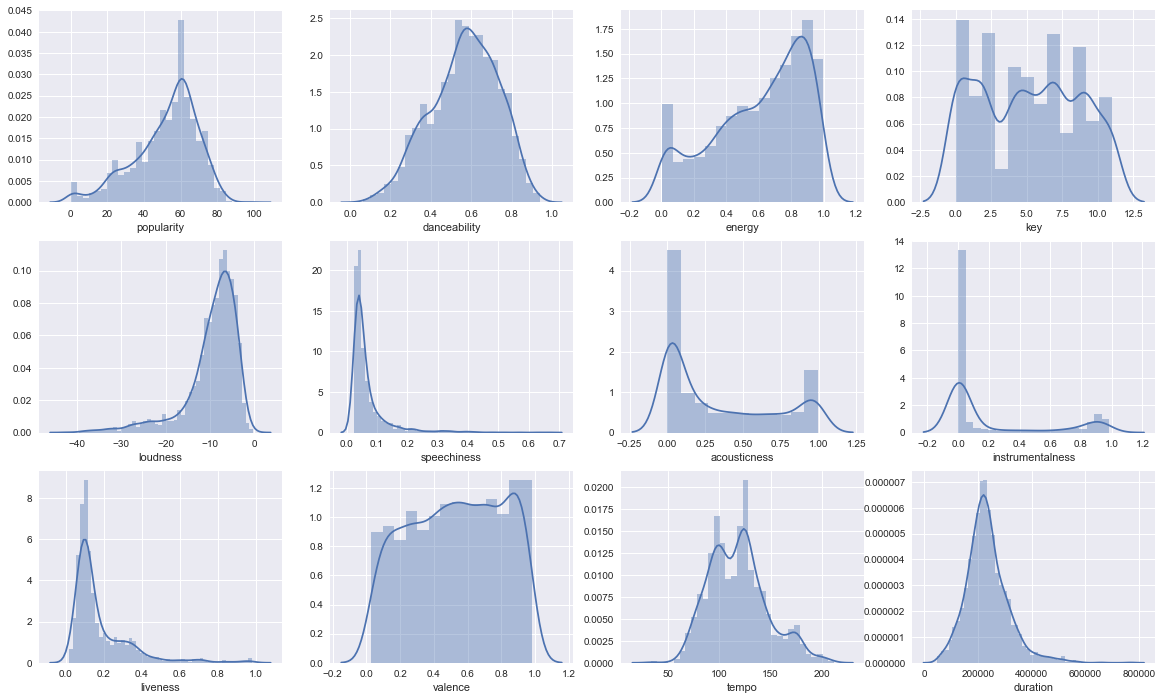

In [192]:
colnames = todotipo.drop(columns=['Unnamed: 0', 'mode', 'id_new']).columns
rows = [0,0,0,0,1,1,1,1,2,2,2,2]
cols = [0,1,2,3]*3
f, axes = plt.subplots(3, 4, figsize=(20, 12), sharex=False)
for colname,i,j in list(zip(colnames,rows,cols)):
    sns.distplot(todotipo.dropna()[colname], ax=axes[i, j])

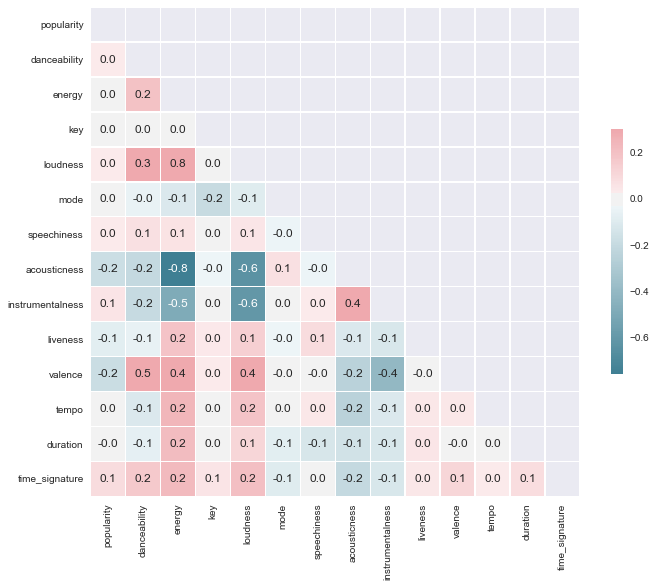

In [193]:
# matriz de correlaciones y heat-map
corr_todotipo = todotipo.dropna().drop(columns=['Unnamed: 0','id_new']).corr()
mask = np.zeros_like(corr_todotipo, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_todotipo, mask=mask, cmap=cmap, vmax=.3, center=0, annot = True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Nuevamente observamos correlaciones bajas y ausencia de outliers. Una importante correlación negativa entre `acousticness` y `energy` de -0.8 es observada.

# Respuesta P2: Juntar Datasets Reggaeton y TodoTipo y Crear Variable Target

A continuación se procede a unnir los datasets y a agregar una variable binaria para identificar el tipo de canción perteneciente a cada dataset. Un valor de 1 corresponderá a la data contenida en Reggaeton (vale decir, canciones que son Reggeton) y 0 corresponderá a la data contenida en TodoTipo (esto es, las canciones de cualquier tipo).

In [194]:
# agregar columna song_type a nuevo dataset reggaeton
reggaeton_2 = reggaeton
reggaeton_2['song_type'] = 1

In [195]:
# agregar columna song_type a nuevo dataset todotipo
todotipo_2 = todotipo
todotipo_2['song_type'] = 0

In [196]:
# chequear si ambos datasets tienen las mismas variables
print("Variables dataset reggaeton")
print(reggaeton.columns)
print("Variables dataset todotipo")
print(todotipo.columns)

Variables dataset reggaeton
Index(['Unnamed: 0', 'popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration', 'id_new', 'song_type'],
      dtype='object')
Variables dataset todotipo
Index(['Unnamed: 0', 'popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration', 'time_signature', 'id_new',
       'song_type'],
      dtype='object')


Podemos observar que el dataset `todotipo_2` tiene la variable `time_signature_2`, la cual no se encuentra en el dataset `reggaeton_2`. Esta variable será eliminada del dataset `consolidado`.

In [197]:
# consolidar datasets y descartar NAs de todotipo
consolidado = reggaeton_2.append(todotipo_2.dropna().drop(columns=['time_signature']))

In [198]:
consolidado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2229
Data columns (total 16 columns):
Unnamed: 0          2292 non-null int64
popularity          2292 non-null float64
danceability        2292 non-null float64
energy              2292 non-null float64
key                 2292 non-null float64
loudness            2292 non-null float64
mode                2292 non-null float64
speechiness         2292 non-null float64
acousticness        2292 non-null float64
instrumentalness    2292 non-null float64
liveness            2292 non-null float64
valence             2292 non-null float64
tempo               2292 non-null float64
duration            2292 non-null float64
id_new              2292 non-null int64
song_type           2292 non-null int64
dtypes: float64(13), int64(3)
memory usage: 304.4 KB


A continuación realizaremos un nuevo análisis descriptivo y de visualización considerando la nueva variable binaria `song_type`. Recordemos que un valor de 1 significa que la canción es un reggaeton, mientras que un valor de 0 indica que es de todo tipo.

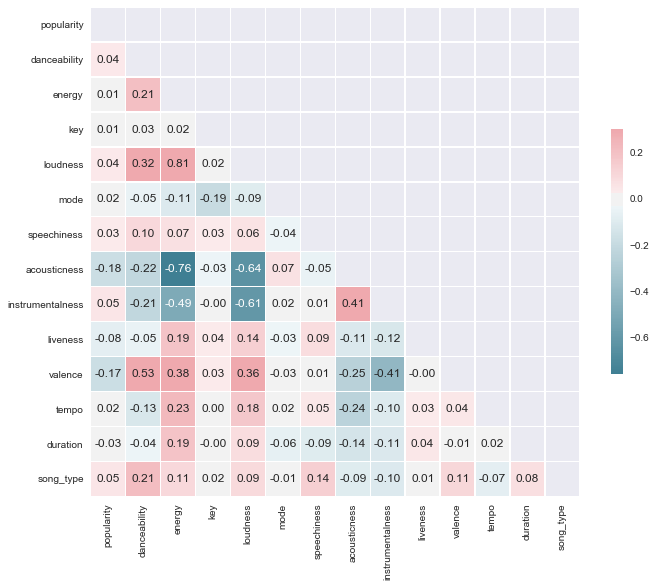

In [201]:
# matriz de correlaciones
corr_consolidado = consolidado.drop(columns=['Unnamed: 0','id_new']).corr()
mask = np.zeros_like(corr_consolidado, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_consolidado, mask=mask, cmap=cmap, vmax=.3, center=0, annot = True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Se observan bajas correlaciones entre la variable target y los predictores. Sin duda la diversidad de estilos musicales al juntar ambos datasets tiene un gran impacto en este sentido. Otro punto es el desbalanceo de de la data, la cual deberá ser corregido para poder estimar los parámetros de los modelos de manera satisfactoria.

A continuación, visualizaremos las distribuciones de las variables más correlacionadas con `song_type` (correlación >= 0.1) y veremos cómo se diferencias entre las dos categorías.

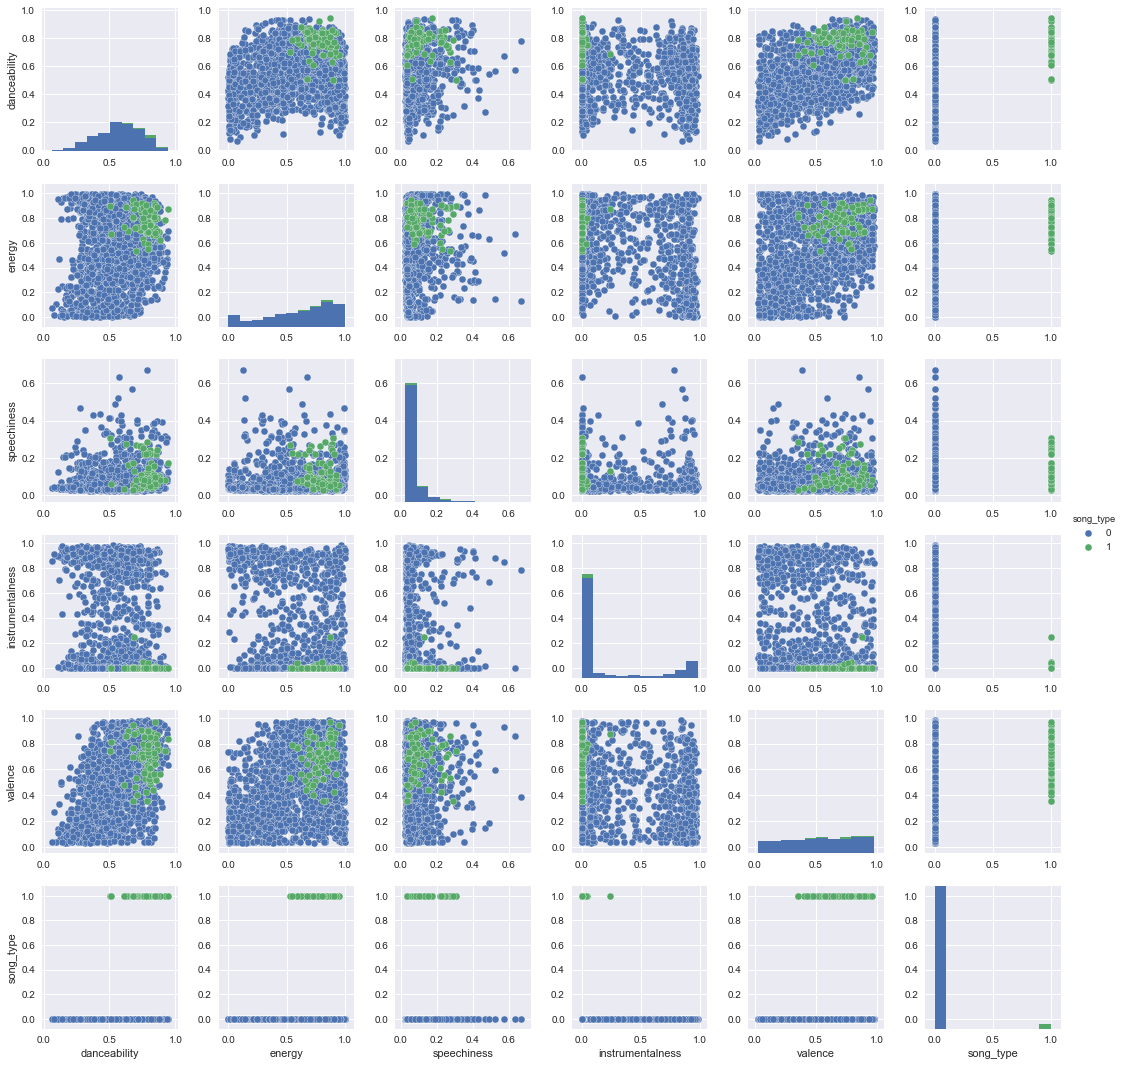

In [204]:
# pairplots
sns.pairplot(consolidado[['danceability', 'energy', 'speechiness',
                         'instrumentalness','valence','song_type']], 
             hue='song_type');

Si bien el dataset está claramente desbalanceado (lo que se corregirá cuando se entrenen los modelos), podemos observar que los valores para estas variables de la categoría **reggaeton** están mucho más concentrados que la otra categoría. Esto tiene sentido, ya que es esperable que las distribuciones de estas variables para canciones de un estilo similar sean más homogeneas que las distribuciones de para canciones de estilos diferentes.

A continuación exportaremos la data para ser utilizada en el entrenamiento de los modelos.

In [207]:
# export data
consolidado.to_csv(path_or_buf='data/consolidado.csv', index=False)